In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

import gc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dfxd = pd.read_csv('/content/drive/My Drive/zmienne_final.csv').drop(columns=['Unnamed: 0'])
pd.set_option('display.max_columns', None)

print(dfxd.shape)
dfxd.head()

(144233, 59)


,isFraud,id_01,id_02,id_05,id_06,id_13,id_12,id_19,id_20,id_30,id_31,ProductCD,DeviceType,id_33,DeviceInfo,TransactionAmt,card1,card2,card3,card4,card5,card6,addr1,dist2,P_emaildomain,R_emaildomain,C1,C2,C4,C6,C7,C8,C10,C11,C12,C13,C14,D2,D6,D8,D9,V44,V45,V86,V87,V149,V156,V188,V189,V200,V201,V203,V210,V245,V257,V258,V259,V264,V265
0,0,0.0,70787.0,-999.0,-999.0,-999.0,NotFound,542.0,144.0,Android,samsung,H,mobile,2000<x<2500,SAMSUNG,50.000,4497,514.0,150.0,mastercard,102.0,credit,420.0,-999.0,gmail,-999,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000,0.000000
1,0,-5.0,98945.0,0.0,-5.0,49.0,NotFound,621.0,500.0,IOS,safari,H,mobile,1000<x<1500,iOS,15.000,2803,100.0,150.0,visa,226.0,debit,337.0,-999.0,anonymous,-999,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000,0.000000
2,0,-5.0,191631.0,0.0,0.0,52.0,NotFound,410.0,142.0,-999,chrome,C,desktop,-999,WINDOWS,75.887,16496,352.0,117.0,mastercard,134.0,credit,-999.0,-999.0,gmail,gmail,1.0,4.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,83.0,0.0,1.0,1.0,1.0,1.0,-999.0,-999.0,1.0,1.0,1.0,1.0,166.215393,90.327904,1.0,1.0,1.0,1.0,166.215393,166.215393
3,0,-5.0,221832.0,0.0,-6.0,52.0,NotFound,176.0,507.0,-999,chrome,C,desktop,-999,-999,16.495,4461,375.0,185.0,mastercard,224.0,debit,-999.0,30.0,hotmail,hotmail,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-999.0,0.0,-999.0,-999.0,1.0,1.0,1.0,1.0,-999.0,-999.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000,0.000000
4,0,0.0,7460.0,1.0,0.0,-999.0,NotFound,529.0,575.0,Mac,chrome,H,desktop,1000<x<1500,INNE,30.000,1790,555.0,150.0,visa,226.0,debit,170.0,-999.0,aol,-999,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,-999.0,-999.0,26.0,0.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000,0.000000


In [0]:
target = "isFraud"

In [0]:
catFeatures=['id_30', 'id_31', 'id_33', 'P_emaildomain', 'R_emaildomain', 'ProductCD', 'DeviceType', 'id_12', 'DeviceInfo', 'card4','card6']


In [0]:
dfxd.fillna(-999, inplace=True)

In [0]:
numFeatures=list(dfxd)

for wy in catFeatures:
 numFeatures.remove(wy)

 numFeatures

In [0]:
from sklearn import preprocessing

In [0]:
for x in catFeatures:
  dfxd[x] = dfxd[x].astype('str')

In [0]:
df = dfxd.copy()
mapy={}
for feature in catFeatures:
    le = preprocessing.LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    mapy[feature] = le

In [0]:
features = df.columns.tolist()
features.remove('isFraud')
print(features)

['id_01', 'id_02', 'id_05', 'id_06', 'id_13', 'id_12', 'id_19', 'id_20', 'id_30', 'id_31', 'ProductCD', 'DeviceType', 'id_33', 'DeviceInfo', 'TransactionAmt', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D2', 'D6', 'D8', 'D9', 'V44', 'V45', 'V86', 'V87', 'V149', 'V156', 'V188', 'V189', 'V200', 'V201', 'V203', 'V210', 'V245', 'V257', 'V258', 'V259', 'V264', 'V265']


In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, average_precision_score


def wrapper(model=RandomForestClassifier, nFolds = 5, randomState=2020, debug=False, features=features, baza=df, sampling=False, sampler=False,saveModels = False, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    testResults = []
    recallTestResults=[]
    recallTrainResults=[]
    predictions=[]
    trainResults = []
    
    indices = []
    models = []

    for train, test in kf.split(baza.index.values):
        clf = model(*args, **kwargs, random_state=randomState)
        if debug:
            print(clf)
        X_train, y_train = baza.iloc[train][features], baza.iloc[train][target] 
        X_test, y_test = baza.iloc[test][features], baza.iloc[test][target]

        if sampling:
          X_train, y_train = sampler.fit_sample(X_train, y_train)

        clf.fit(X_train, y_train)
        predsTrain = clf.predict_proba(X_train)[:,1]
        preds = clf.predict_proba(X_test)[:,1]
                              
        predictions.append(preds.tolist().copy())
        
        indices.append(baza.iloc[test].index.tolist().copy())
        
        trainScore = roc_auc_score((y_train==1).astype(int), predsTrain)
        testScore = roc_auc_score((y_test==1).astype(int), preds)
        trainResults.append(trainScore)
        testResults.append(testScore)
        recallTrainScore = average_precision_score((y_train==1).astype(int), predsTrain)
        recallTestScore = average_precision_score((y_test==1).astype(int), preds)
        recallTrainResults.append(recallTrainScore)
        recallTestResults.append(recallTestScore)

        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore,
                  )
            
        if saveModels:
          models.append(clf)

        
    return trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models


In [0]:
trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(debug=True)
print(np.mean(testResults))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)
Train AUC: 1.0 Valid AUC: 0.9624033497354079
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_e

In [0]:
#  n_estimators
for k in [50, 70, 90]:

    trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=k)
    print(k, np.mean(recallTrainResults), np.mean(recallTestResults), np.mean(recallTrainResults) - np.mean(recallTestResults))

50 0.9999997410326932 0.8693498710005612 0.13064987003213202
70 0.99999999512907 0.8740560000669738 0.1259439950620962
90 1.0 0.8768082728703904 0.12319172712960957


In [0]:
for k in range(30,42,2):
    trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=90, max_depth=k)
    print(k, np.mean(recallTrainResults), np.mean(recallTestResults), np.mean(recallTrainResults) - np.mean(recallTestResults))

30 0.9995006726948923 0.8789236763648052 0.12057699633008712
32 0.9998455058518682 0.8795491226850117 0.12029638316685642
34 0.9999758067480414 0.8803329701372137 0.11964283661082775
36 0.999995386313639 0.8800766164118115 0.1199187699018276
38 0.9999995327281402 0.8795013062405201 0.1204982264876201
40 0.9999999706429865 0.8786084304738836 0.12139154016910292


In [0]:
for k in range(10, 20,2):
    trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=90, max_depth=34,
                                                                    max_features=k)
    print(k, np.mean(recallTrainResults), np.mean(recallTestResults), np.mean(recallTrainResults) - np.mean(recallTestResults))

10 0.9999900299313118 0.8816362840617659 0.11835374586954595
12 0.9999954906677013 0.8827562434048601 0.11723924726284118
14 0.9999939779927407 0.8830147556984056 0.1169792222943351
16 0.9999979064222941 0.8836727558663886 0.11632515055590553
18 0.9999990701572112 0.8834283578464313 0.11657071231077998


In [0]:
for k in [2, 4, 6, 8, 10, 15, 20, 30]:
    trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=90, max_depth=34,
                                                                    max_features=16,
                                                                    min_samples_split=k)
    print(k, np.mean(recallTestResults))

2 0.8836727558663886
4 0.8809437160405837
6 0.8783197958297866
8 0.8749154698034671
10 0.8717009888406144
15 0.8643655377458623
20 0.8588833186265188
30 0.8491114854222268


In [0]:
for k in [1, 2]:
    trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=90, max_depth=34,
                                                                    max_features=16,
                                                                    min_samples_split=2, min_samples_leaf=k)
    print(k, np.mean(recallTestResults))

1 0.8836727558663886
2 0.8771861933116881


In [0]:
trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=90, max_depth=34,
                                                                    max_features=16,
                                                                    min_samples_split=2, min_samples_leaf=1, saveModels=True)
print(k, np.mean(recallTestResults))

modelRF = {
    "name":"RF",
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

30 0.8836727558663886


In [0]:
imps = list(zip(models[0].feature_importances_, features))
imps.sort(reverse=True)
imps

[(0.10240876882007936, 'C1'),
 (0.06681063147412727, 'V258'),
 (0.04454444288570454, 'C13'),
 (0.04098525014613061, 'C14'),
 (0.03507443786992483, 'V201'),
 (0.03415569945792413, 'TransactionAmt'),
 (0.03128418602618284, 'id_02'),
 (0.029195483556813895, 'card1'),
 (0.029130021744535377, 'V257'),
 (0.025952254944191736, 'card2'),
 (0.024098914162327664, 'id_20'),
 (0.021588156805521147, 'C11'),
 (0.021028743911362863, 'V45'),
 (0.02024756899481192, 'D8'),
 (0.020027105299888683, 'id_19'),
 (0.01787193130885874, 'V200'),
 (0.015252235598231394, 'id_01'),
 (0.015193944735400356, 'C2'),
 (0.014686076715348136, 'R_emaildomain'),
 (0.014669995402679988, 'V189'),
 (0.014017022069124202, 'id_05'),
 (0.013473479915777124, 'id_13'),
 (0.01331026658055159, 'card5'),
 (0.012905255910779751, 'D2'),
 (0.012814279888363356, 'C6'),
 (0.012626925524884824, 'P_emaildomain'),
 (0.012520387726341021, 'C12'),
 (0.012411648696175184, 'C10'),
 (0.012353816773915954, 'V210'),
 (0.012300112952179806, 'D9'),
 

In [0]:
results = []

In [0]:
import random
for k in range(50):
    params = {
        "max_depth" : random.randint(6, 22),
        "max_features" : random.randint(2, 12),
        "min_samples_split" : random.randint(2, 9),
    }
    params["min_samples_leaf"] = random.randint(1, params["min_samples_split"])
    
    trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=100,
                                                                    max_depth=params["max_depth"],
                                                                    max_features=params["max_features"],
                                                                    min_samples_split=params["min_samples_split"],
                                                                    min_samples_leaf=params["min_samples_leaf"])
    
    results.append((np.mean(testResults), params.copy()))
    
    print(params, np.mean(testResults))
    
    if k>1 and k%10==0:    
        print("\n Top 5:")
        for score, params in sorted(results, key=lambda x: x[0], reverse=True)[0:5]:
            print(params, score)
        print()

In [0]:
plt.plot([x for x, y in sorted(results, key=lambda x: x[0], reverse=True)])

In [0]:
trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=500, max_depth=20,
                                                                    max_features=4,
                                                                    min_samples_split=4, min_samples_leaf=1,
                                                                        saveModels=True)

In [0]:
trainResults, testResults, predictions, indices, recallTestResults, recallTrainResults, models = wrapper(n_estimators=90, max_depth=34,
                                                                    max_features=16,
                                                                    min_samples_split=2, min_samples_leaf=1, saveModels=True)
print(np.mean(recallTestResults))

modelRF = {
    "name":"RF",
    "trainResults":recallTrainResults.copy(),
    "testResults":recallTestResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

0.8836727558663886


In [0]:
import pickle
with open("model_RF_1.p", "wb") as fp:
    pickle.dump(modelRF, fp)

In [0]:
from sklearn.metrics import precision_recall_curve
def plotAP(results):

	fig, ax = plt.subplots(figsize=(10,9))

	for true, pred, label in results:
		precision, recall, thresholds = precision_recall_curve(true, pred)
		average_precision = average_precision_score(true, pred)
		average_precision = round(average_precision, 4)
		lw=2
		ax.plot(recall, precision, lw=lw, label=f'{label}: {average_precision}')
  
	ax.set_xlim([0, 1])
	ax.set_ylim([0.0, 1.01])
	ax.set_xlabel('Recall')
	ax.set_ylabel('Precision')
	ax.set_title(f'Precision Recall Curve ')
	ax.legend(loc="lower right")
	plt.show()

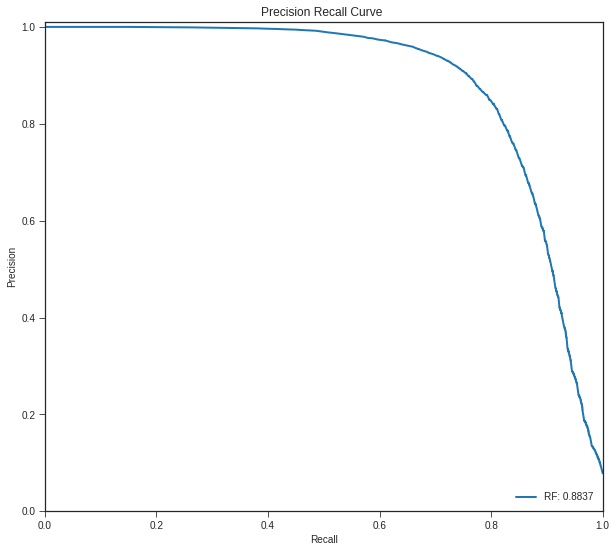

In [0]:
res2plot = []
true = (df[target]==1).astype(int).sort_index()
pred = pd.Series(sum(modelRF["predictions"], []), index=sum(modelRF["indices"], [])).sort_index()
res2plot.append((true, pred, modelRF["name"]))
plotAP(res2plot)


In [0]:
estimator = models[3].estimators_[5]


In [0]:
estimator = models[1].estimators_[5]


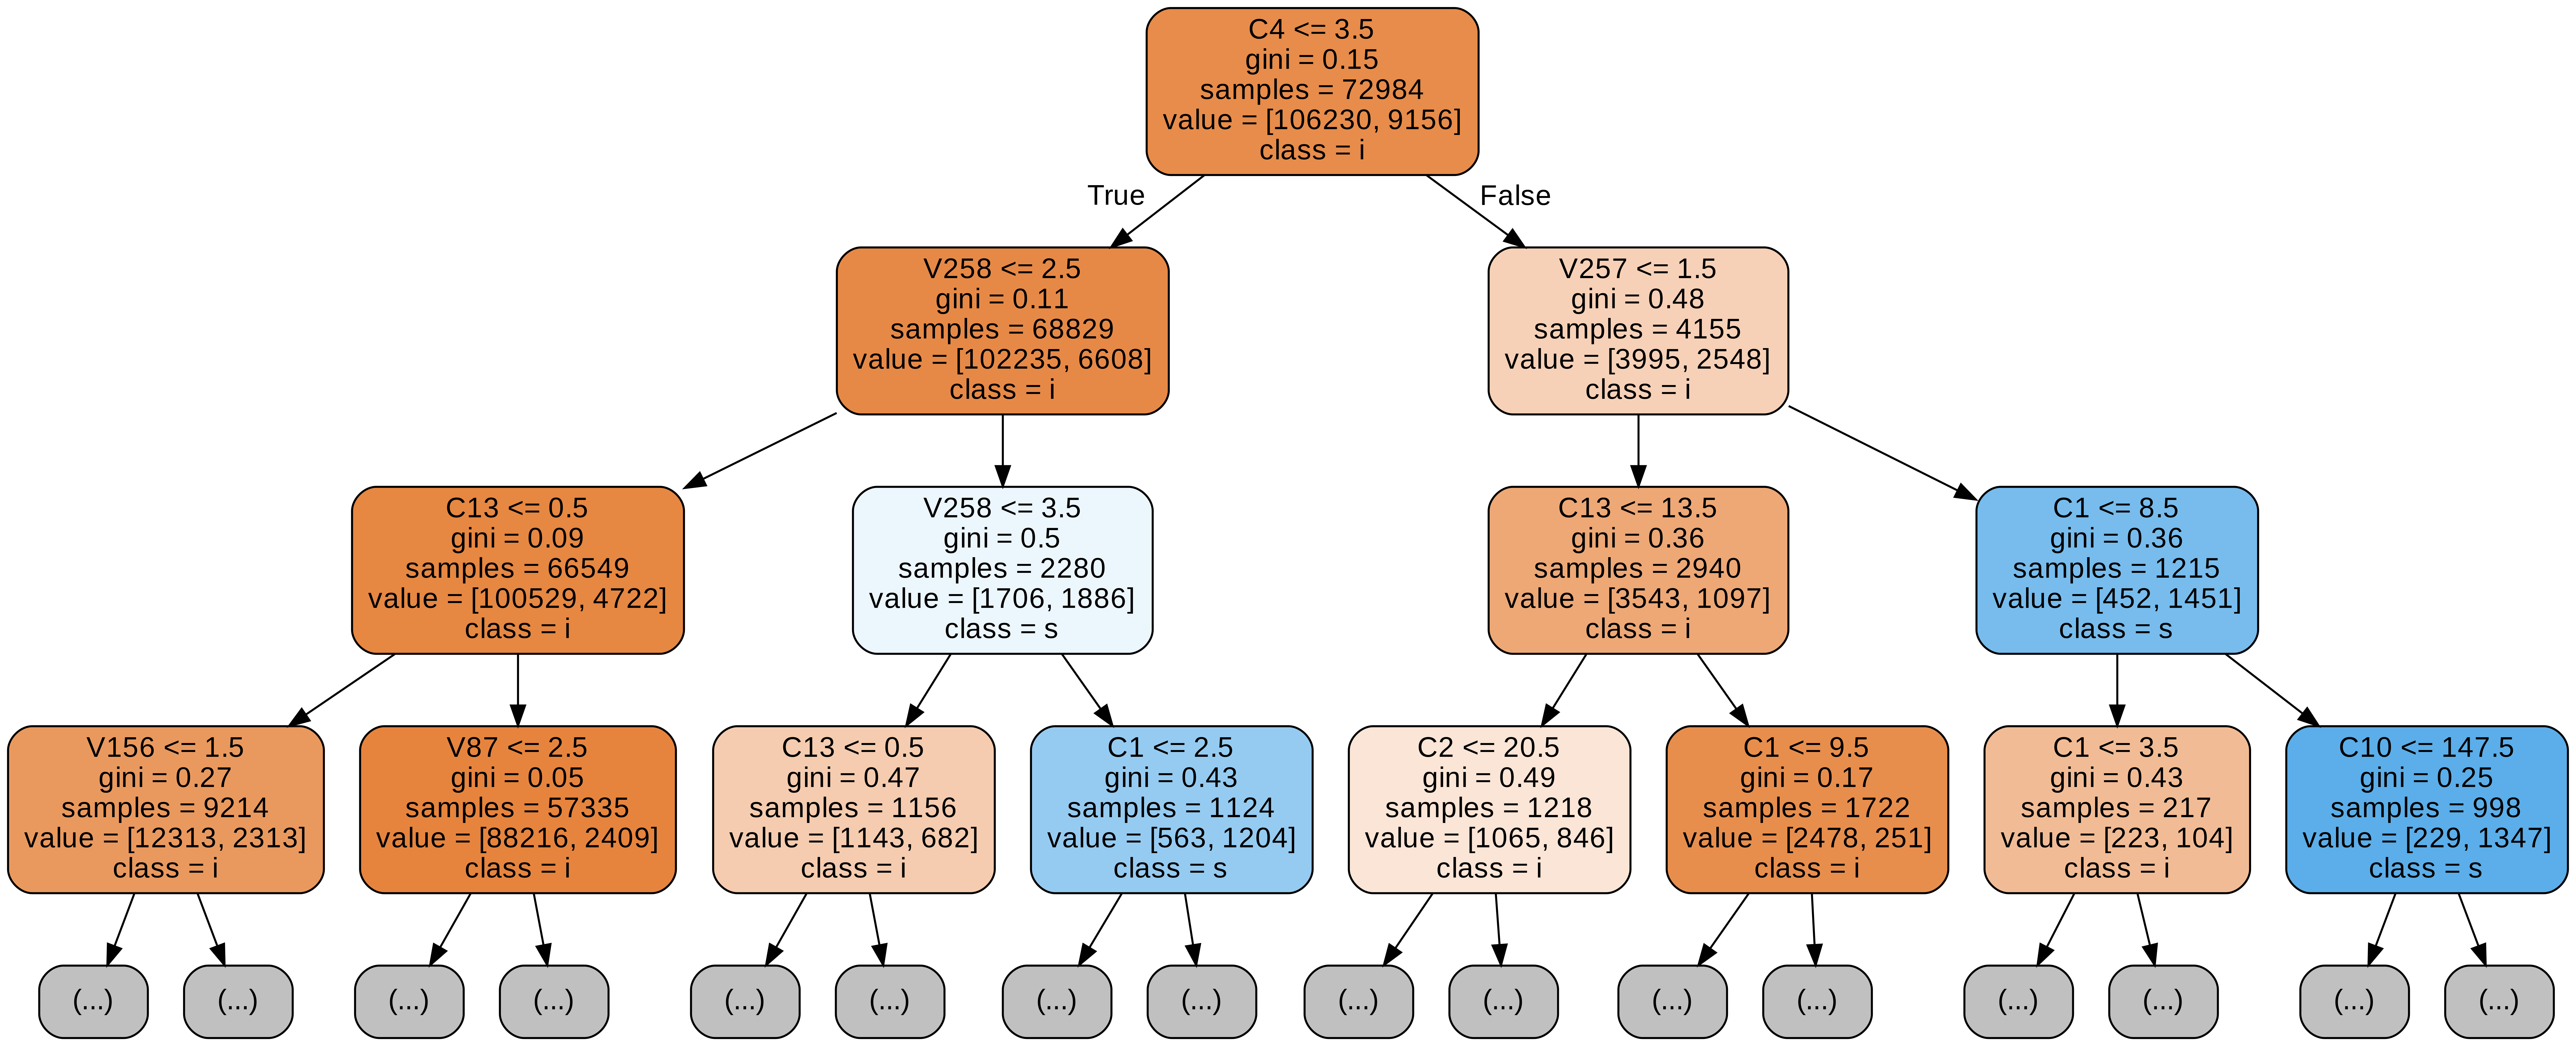

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = target,
                rounded = True, proportion = False, 
                precision = 2, filled = True,
                max_depth=3)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')